# Titanic Dataset - Exploratory Data Analysis

In [79]:
#importing all libraries
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
#titanic data has splitted as train and test dataset, so for EDA process we concatinating both data into titanic dataframe 
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data.shape)
print(test_data.shape)
titanic_df = pd.concat([train_data,test_data])
titanic_df.shape


(889, 12)
(417, 10)


(1306, 12)

In [81]:
#information about the titanic dataframe
titanic_df.info() #Type of the variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 416
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1306 non-null   int64  
 1   Survived     889 non-null    float64
 2   Pclass       1306 non-null   int64  
 3   Name         1306 non-null   object 
 4   Sex          1306 non-null   object 
 5   Age          1306 non-null   float64
 6   SibSp        1306 non-null   int64  
 7   Parch        1306 non-null   int64  
 8   Ticket       1306 non-null   object 
 9   Fare         1306 non-null   float64
 10  Cabin        202 non-null    object 
 11  Embarked     1306 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.6+ KB


In [82]:
#top 5 rows of dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
#Checking for NA values
titanic_df.isna().sum()

PassengerId       0
Survived        417
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1104
Embarked          0
dtype: int64

1. cabin 1104 na values out of 1306 values 
2. survieved column has 417 na vaues out of 1306 values

# Exploring the data

__By Survived column:__

In [84]:
titanic_df['Survived'].value_counts()

0.0    549
1.0    340
Name: Survived, dtype: int64

549
340


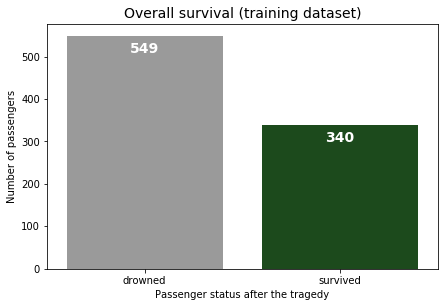

In [85]:
plt.figure(figsize=(7, 4.5)) 
ax = sns.countplot(x = 'Survived', data = titanic_df, palette=["#9a9a9a", "#145214"])
plt.xticks( np.arange(2), ['drowned', 'survived'] )
plt.title('Overall survival (training dataset)',fontsize= 14)
plt.xlabel('Passenger status after the tragedy')
plt.ylabel('Number of passengers')
labels = (titanic_df['Survived'].value_counts())
for i,v in enumerate(labels):
    print(v)
    ax.text(i, v-40, str(v), horizontalalignment='center', size=14, color='w', fontweight='bold')    
plt.show();

In [86]:
titanic_df['Survived'].value_counts(normalize = True)#returns the relative frequency by dividing all values by the sum of values

0.0    0.617548
1.0    0.382452
Name: Survived, dtype: float64

i.e, 38.2% people are survived.
     61.7% people are drowned.


__by Age:__

In [87]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1306.000000,889.000000,1306.000000,1306.000000,1306.00000,1306.000000,1306.000000
mean,655.022205,0.382452,2.296325,32.871493,0.50000,0.385911,33.223956
std,377.913727,0.486260,0.837037,14.209716,1.04258,0.866357,51.765986
min,1.000000,0.000000,1.000000,0.170000,0.00000,0.000000,0.000000
25%,328.250000,0.000000,2.000000,22.000000,0.00000,0.000000,7.895800
50%,654.500000,0.000000,3.000000,32.000000,0.00000,0.000000,14.454200
75%,981.750000,1.000000,3.000000,45.000000,1.00000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.00000,9.000000,512.329200


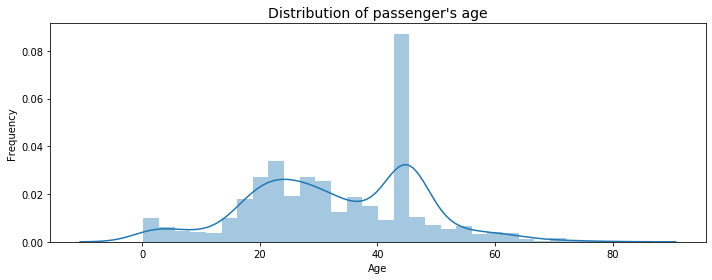

In [88]:
#Distribution of Age
plt.figure(figsize=(10,4))
sns.distplot(titanic_df['Age'],bins = 30)
plt.title("Distribution of passenger's age", fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout();

In [89]:
age_dis = pd.DataFrame(titanic_df['Age'].describe())
# Transpose index and columns.
age_dis.T


,count,mean,std,min,25%,50%,75%,max
Age,1306.0,32.871493,14.209716,0.17,22.0,32.0,45.0,80.0


From newborn babies and old ages, All age people are travelled in titanic ship.

# Age by Surviving Status

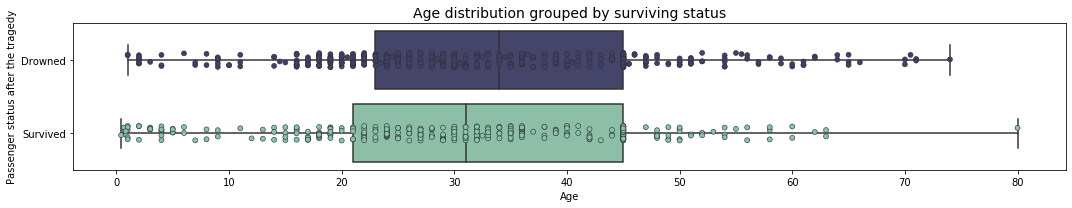

In [90]:
plt.figure(figsize=(15,3))

#Boxplot to show age distributions with respect to survival status  
sns.boxplot(y='Survived', x = 'Age', data=titanic_df, orient='h', palette=["#3f3e6fd1", "#85c6a9"]) 


#Adding stripplot for each category
sns.stripplot(y='Survived', x='Age', data = titanic_df, orient='h',linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"])
plt.yticks(np.arange(2),['Drowned','Survived'])
plt.title('Age distribution grouped by surviving status',fontsize= 14)
plt.ylabel('Passenger status after the tragedy')
plt.tight_layout();

In [91]:
# Statistical distribution for passenger's age by survived and drowned 
pd.DataFrame(titanic_df.groupby('Survived')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,549.0,33.898907,13.835889,1.00,23.0,34.0,45.0,74.0
1.0,340.0,30.763735,14.954178,0.42,21.0,31.0,45.0,80.0


Insights from Statistical distribution for passenger's age by survived and drowned data.
1. 340 people only survived out of 889.
2. minimum age of drowned passenger is 1 year baby
3. maximum age of drowned pessenger is 74

In [92]:
titanic_df[titanic_df['Age'] == 80] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
629,631,1.0,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


Their is only one 80 year old person survived. Its is a outlier in this column. 

In [93]:
titanic_df.loc[titanic_df['PassengerId'] == 631, 'Age'] = 48

In [94]:
pd.DataFrame(titanic_df.groupby('Survived')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0.0,549.0,33.898907,13.835889,1.00,23.0,34.0,45.0,74.0
1.0,340.0,30.669618,14.742587,0.42,21.0,31.0,45.0,63.0


1. Now the maximum age of survived passenger is 63.
2. younger people have more changes to survive than elders.

# Age by Class

In [95]:
titanic_df.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,321.0,39.702243,13.580609,0.92,30.0,42.0,48.0,76.0
2,277.0,30.401625,13.723722,0.67,23.0,29.0,40.0,70.0
3,708.0,30.695621,13.585517,0.17,21.0,30.0,45.0,74.0


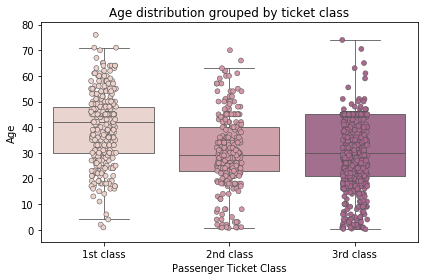

In [96]:
palette = sns.cubehelix_palette(5, start = 3)
sns.boxplot(x='Pclass', y='Age', data=titanic_df, fliersize=0, linewidth=0.8, palette=palette)
sns.stripplot(x='Pclass', y='Age', data=titanic_df, linewidth=0.5, palette = palette )
plt.title("Age distribution grouped by ticket class")
plt.xticks( np.arange(3), ['1st class', '2nd class', '3rd class'])
plt.xlabel("Passenger Ticket Class")
plt.tight_layout()
plt.show()

In 1st Class, We can see a wider distribution, compared to other 2 classes.

# Age Vs Class Vs Gender

In [97]:
#Splitting the dataframe to passenger ticket class wise analysis
age_1_class = titanic_df[ (titanic_df['Age']>0) & (titanic_df['Pclass'] == 1)]
age_2_class = titanic_df[ (titanic_df['Age']>0) & (titanic_df['Pclass'] == 2)]
age_3_class = titanic_df[ (titanic_df['Age']>0) & (titanic_df['Pclass'] == 3)]

In [98]:
print("1st Class Passengers -",age_1_class['PassengerId'].count())
print("2nd Class Passengers -",age_2_class['PassengerId'].count())
print("3rd Class Passengers -",age_3_class['PassengerId'].count())

1st Class Passengers - 321
2nd Class Passengers - 277
3rd Class Passengers - 708


In [99]:
#Passenger's ticket class wise staistical summary.
age_1_class_stat = (age_1_class.groupby('Sex')['Age'].describe())
age_2_class_stat = (age_2_class.groupby('Sex')['Age'].describe())
age_3_class_stat = (age_3_class.groupby('Sex')['Age'].describe())
pd.concat([age_1_class_stat, age_2_class_stat, age_3_class_stat], axis=0, sort = False, keys = ['1st', '2nd', '3rd'])

count       mean        std   min    25%    50%    75%   max
    Sex                                                                 
1st female  142.0  37.471831  13.821401  2.00  25.25  36.50  47.75  76.0
    male    179.0  41.471620  13.157717  0.92  32.25  45.00  49.00  71.0
2nd female  106.0  27.994528  13.055768  0.92  20.25  28.00  35.75  60.0
    male    171.0  31.893743  13.951497  0.67  23.00  30.00  42.00  70.0
3rd female  216.0  28.945231  14.617033  0.17  18.00  28.00  45.00  63.0
    male    492.0  31.464085  13.048524  0.33  21.00  30.75  45.00  74.0

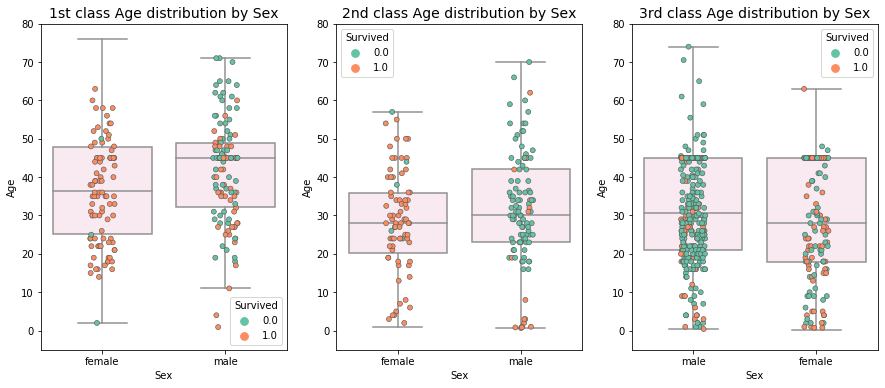

In [100]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x = 'Sex', y = 'Age', data = age_1_class,
     palette = ["#fce6f0"], fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', hue='Survived', data = age_1_class,
     linewidth = 0.6, palette = "Set2")
plt.title('1st class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.subplot(1, 3, 2)
sns.boxplot(x = 'Sex', y = 'Age', data = age_2_class,
     palette = ["#fce6f0"], fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', hue='Survived', data = age_2_class,
     linewidth = 0.6, palette = "Set2")
plt.title('2nd class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.subplot(1, 3, 3)
sns.boxplot(x = 'Sex', y = 'Age', data = age_3_class,
     palette = ["#fce6f0"], fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', hue='Survived', data = age_3_class,
     linewidth = 0.6, palette = "Set2")
plt.title('3rd class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.show()

    1.almost all the female passengers are rescued from 1st and 2nd class passengers.
    2.from male passengers below 10 year all are also rescued, i.e kids are saved. 
    3.Maximum number of males are travelled in 3rd class than 1st and 2nd.
    4.Sadly maximum number of male passengers are drowned.

# Survived by title:

In [101]:
p_name = titanic_df['Name'][1].iloc[0].split(',')
p_name

['Cumings', ' Mrs. John Bradley (Florence Briggs Thayer)']

In [102]:
titanic_df['Title'] = titanic_df['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0].str.strip(' ')

In [103]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [104]:
s = titanic_df['Title'].value_counts()

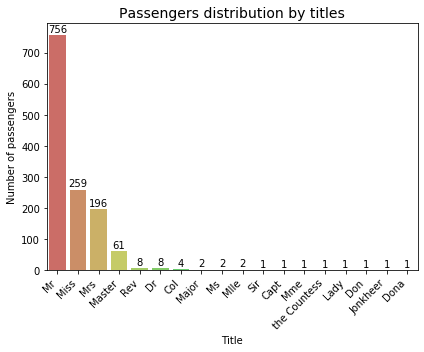

In [105]:
plt.figure(figsize=(6, 5))
ax = sns.countplot( x = 'Title', data = titanic_df, palette = "hls", order = s.index)
_ = plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'  
)

plt.title('Passengers distribution by titles',fontsize= 14)
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (s)
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.tight_layout()
plt.show();

__Passenger title by Survived__

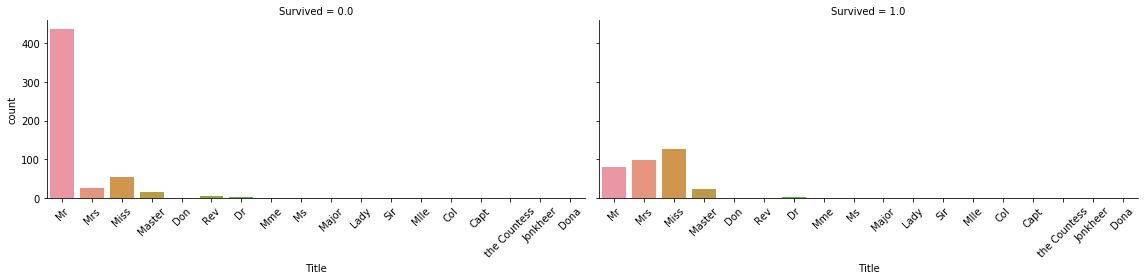

In [106]:
category_survived = sns.catplot(x='Title', col='Survived', data=titanic_df, height=4, aspect=2, kind='count')

category_survived.set_xticklabels(rotation=45)
plt.tight_layout();

1. All Master's are rescued.
2. In Mrs and Miss categories maximum people are saved 
3. Very less amount of Mr Category people are survived and Most of them are drowned.

__Proportion of 1st/2nd/3rd ticket class in each title category__

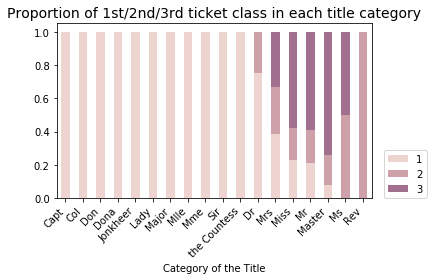

In [107]:
class_by_title_cat = titanic_df.groupby('Title')['Pclass'].value_counts(normalize = True)
class_by_title_cat = class_by_title_cat.unstack().sort_values(by = 1, ascending = False)
class_by_title_cat.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'])

plt.legend(loc=(1.04,0))
_ = plt.xticks(
    rotation = 45, 
    horizontalalignment = 'right',
    fontweight = 'light'  
)


plt.title('Proportion of 1st/2nd/3rd ticket class in each title category',fontsize= 14)
plt.xlabel('Category of the Title')
plt.tight_layout()

1. All the Capt,col,Don,Dona,Jonkheer,Lady,Major,Mile,Mme,Sir,The Countless are travelled only in 1st class ticket. 
2. Also all the Reverands are travelled in 2nd Class tickets only.
3. Majority of Master title are in 3rd class.

# Cabin

In [108]:
titanic_df.shape

(1306, 13)

In [109]:
titanic_df['Cabin'].isna().sum()

1104

__84 % of cabin data is missing__

In [110]:
titanic_df['deck'] = titanic_df['Cabin'].str.split('', expand = True)[1] #Adding new column called deck
titanic_df.loc[titanic_df['deck'].isna(), 'deck'] = 'U'
print('Unique deck letters from the cabin numbers:', titanic_df['deck'].unique())

Unique deck letters from the cabin numbers: ['U' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


In [111]:
titanic_df['deck'].value_counts()

U    1104
C      59
B      45
D      33
E      32
A      15
F      13
G       4
T       1
Name: deck, dtype: int64

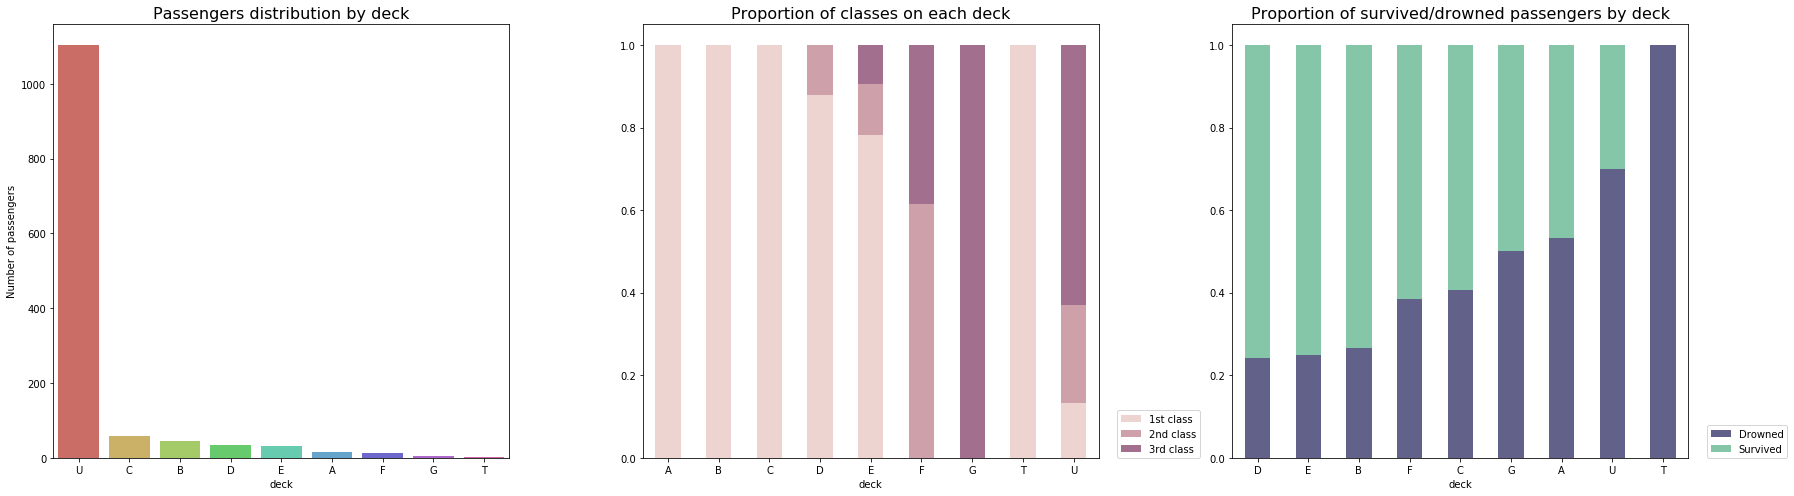

In [112]:
fig = plt.figure(figsize=(25, 7))

ax1 = fig.add_subplot(131)
sns.countplot(x = 'deck', data = titanic_df, palette = "hls", order = titanic_df['deck'].value_counts().index, ax = ax1)
plt.title('Passengers distribution by deck',fontsize= 16)
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(132)
deck_by_class = titanic_df.groupby('deck')['Pclass'].value_counts(normalize = True).unstack()
deck_by_class.plot(kind='bar', stacked='True',color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax2)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of classes on each deck',fontsize= 16)
plt.xticks(rotation = False)

ax3 = fig.add_subplot(133)
deck_by_survived = titanic_df.groupby('deck')['Survived'].value_counts(normalize = True).unstack()
deck_by_survived = deck_by_survived.sort_values(by = 1, ascending = False)
deck_by_survived.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax3)
plt.title('Proportion of survived/drowned passengers by deck',fontsize= 16)
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)
plt.tight_layout()

plt.show()


In [113]:
titanic_df[(titanic_df['deck']=='A') & (titanic_df['Survived']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,deck
95,97,0.0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Mr,A
173,175,0.0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C,Mr,A
184,186,0.0,1,"Rood, Mr. Hugh Roscoe",male,45.0,0,0,113767,50.0000,A32,S,Mr,A
283,285,0.0,1,"Smith, Mr. Richard William",male,45.0,0,0,113056,26.0000,A19,S,Mr,A
474,476,0.0,1,"Clifford, Mr. George Quincy",male,45.0,0,0,110465,52.0000,A14,S,Mr,A
582,584,0.0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C,Mr,A
805,807,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,Mr,A
865,868,0.0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,Mr,A


These all passengers class are 1st class, all male passengers are in deck A. 

# Family Size 7

In [114]:
titanic_df['Family_size'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1
family_size = titanic_df['Family_size'].value_counts()
print("Family size and the number of passengers:")
print(family_size)

Family size and the number of passengers:
1     787
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_size, dtype: int64


In [115]:
titanic_df['Surname'] = titanic_df['Name'].str.split(',', expand=True)[0]
titanic_df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,deck,Family_size,Surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,U,2,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,2,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,U,1,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,2,Futrelle


In [116]:
# Group ppl with family size = 7 by Surname
titanic_df[titanic_df['Family_size'] ==7 ]['Surname'].value_counts()

Andersson    9
Asplund      7
Name: Surname, dtype: int64

In [117]:
titanic_df[ (titanic_df['Family_size'] ==7) & (titanic_df['Surname']=='Andersson') ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,deck,Family_size,Surname
13,14,0.0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,Mr,U,7,Andersson
67,69,1.0,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.925,NaN,S,Miss,U,7,Andersson
118,120,0.0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S,Miss,U,7,Andersson
540,542,0.0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S,Miss,U,7,Andersson
541,543,0.0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S,Miss,U,7,Andersson
609,611,0.0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S,Mrs,U,7,Andersson
812,814,0.0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S,Miss,U,7,Andersson
848,851,0.0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S,Master,U,7,Andersson
213,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,NaN,S,Miss,U,7,Andersson


Let's group Andersons with 7-size family by ticket number.
There are 7 of them used the same ticket and travelled together. 5 children (each of them has 4 siblings) and 2 parents. To passengers used separated tickets.

In [118]:
titanic_df[(titanic_df['Family_size'] == 7) & (titanic_df['Surname']=='Andersson')].Ticket.value_counts()

347082     7
347091     1
3101281    1
Name: Ticket, dtype: int64

In [119]:
titanic_df[(titanic_df['Ticket'] == '3101281') | (titanic_df['Ticket'] == '347091')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,deck,Family_size,Surname
67,69,1.0,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.925,NaN,S,Miss,U,7,Andersson
213,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.775,NaN,S,Miss,U,7,Andersson


Looks like they actually traveled alone, I will correct that data.

In [120]:
titanic_df.loc[titanic_df['PassengerId'] == 69, ['SibSp', 'Parch', 'Family_size']] = [0,0,1]
titanic_df.loc[titanic_df['PassengerId'] == 1106, ['SibSp', 'Parch', 'Family_size']] = [0,0,1]
titanic_df[(titanic_df['Ticket'] == '3101281') | (titanic_df['Ticket'] == '347091')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,deck,Family_size,Surname
67,69,1.0,3,"Andersson, Miss. Erna Alexandra",female,17.0,0,0,3101281,7.925,NaN,S,Miss,U,1,Andersson
213,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,0,0,347091,7.775,NaN,S,Miss,U,1,Andersson


Because of different travel tickets, i have been changed 'SibSp', 'Parch', 'Family_size' columns for the right prediction to  ticket no 3101281 & 347091.

# Family Size 5

In [121]:
titanic_df[titanic_df['Family_size'] == 5]['Surname'].value_counts()

Ryerson          5
Palsson          5
Lefebre          5
Ford             5
Hocking          1
Kink-Heilmann    1
Name: Surname, dtype: int64

In [122]:
titanic_df[(titanic_df['Surname'] == 'Kink-Heilmann')&(titanic_df['Family_size'] == 5)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,deck,Family_size,Surname
393,1286,NaN,3,"Kink-Heilmann, Mr. Anton",male,29.0,3,1,315153,22.025,NaN,S,Mr,U,5,Kink-Heilmann


Kink-Heilmann, Mr. Anton	 had 2 other siblings on the ship unlike his wife, for whom these relatives do not fit the description of relatives in the data set. We will assume that all other "mismatches" in the groups are similar to this. Since I plan to group the size of families into groups, this will eliminate possible inconsistencies.

# Family size and chanses for surviving

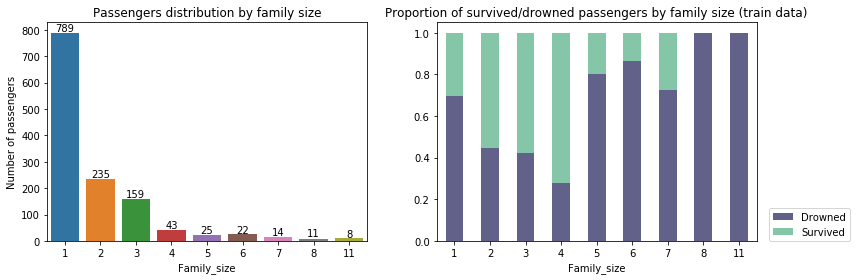

In [123]:
fig = plt.figure(figsize = (12,4))

ax1 = fig.add_subplot(121)
ax = sns.countplot(titanic_df['Family_size'], ax = ax1)

# calculate passengers for each category
labels = (titanic_df['Family_size'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(122)
d = titanic_df.groupby('Family_size')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of survived/drowned passengers by family size (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)

plt.tight_layout()

1. All the members from Family size of 11 died.
2. Most of the passengers traveling Solo survived.
3. The chances of Survival for Family size=4  is found to be higher.

__Lets create a 'Family_size_group' variable with 4 categories:__

  1. Single
  2. Usual(2,3,4)
  3. big(5,6,7)
  4. large(bigger than 7



In [124]:
titanic_df['Family_size_group'] = titanic_df['Family_size'].map(lambda x: 'f_single' if x == 1 
                                                            else ('f_usual' if 5 > x >= 2 
                                                                  else ('f_big' if 8 > x >= 5 
                                                                       else 'f_large' )
                                                                 ))                                                       

In [125]:
titanic_df['Family_size_group'].value_counts()

f_single    789
f_usual     437
f_big        61
f_large      19
Name: Family_size_group, dtype: int64

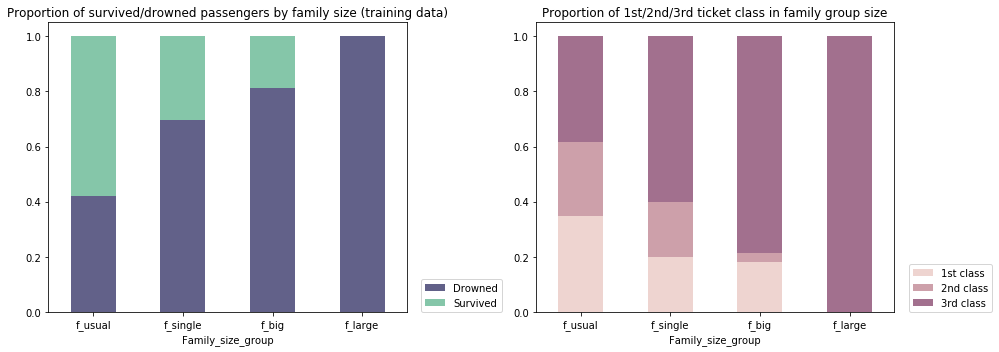

In [126]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(121)
d = titanic_df.groupby('Family_size_group')['Survived'].value_counts(normalize = True).unstack()
d = d.sort_values(by = 1, ascending = False)
d.plot(kind='bar', stacked='True', color = ["#3f3e6fd1", "#85c6a9"], ax = ax1)
plt.title('Proportion of survived/drowned passengers by family size (training data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)


ax2 = fig.add_subplot(122)
d2 = titanic_df.groupby('Family_size_group')['Pclass'].value_counts(normalize = True).unstack()
d2 = d2.sort_values(by = 1, ascending = False)
d2.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax2)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of 1st/2nd/3rd ticket class in family group size')
_ = plt.xticks(rotation=False)

plt.tight_layout()

# Class
We have made a lot of assumptions about the survival rate depending on the classes. Let's now look closely at this variable.
# Passengers by class

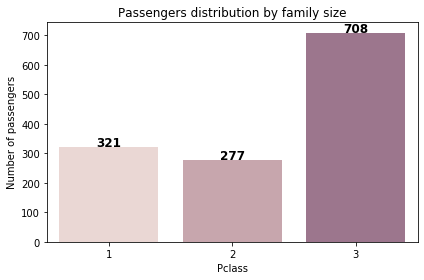

In [127]:
ax = sns.countplot(titanic_df['Pclass'], palette = ['#eed4d0', '#cda0aa', '#a2708e'])
# calculate passengers for each category
labels = (titanic_df['Pclass'].value_counts(sort = False))
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+2, str(v), horizontalalignment = 'center', size = 12, color = 'black', fontweight = 'bold')
    
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')
plt.tight_layout()

1. Majority of the Titanic's passengers belonged to 3rd Class.
2. Also an interesting thing to note is the no of 1st class passengers is larger than 2nd class passengers.

# Class vs surviving status

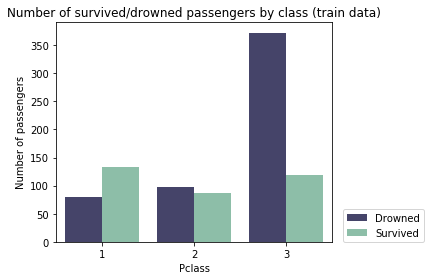

In [128]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic_df, palette=["#3f3e6fd1", "#85c6a9"])
plt.title('Number of survived/drowned passengers by class (train data)')
plt.ylabel('Number of passengers')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

plt.tight_layout()

# Class vs Surviving status vs Gender

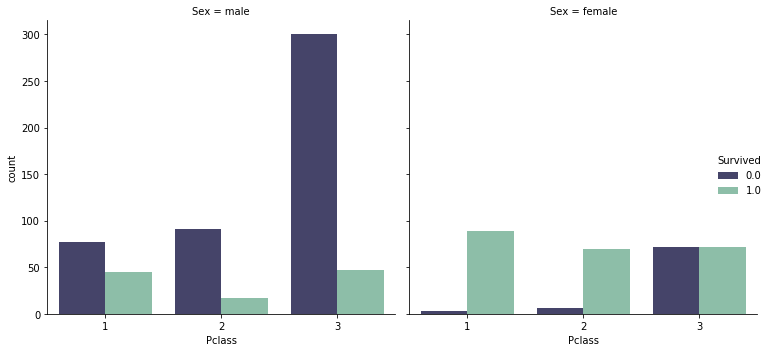

In [129]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data = titanic_df , palette=["#3f3e6fd1", "#85c6a9"])
plt.tight_layout()

1. Most of the Male passengers of the first class drowned and almost all the females of first class survived.
2. Most of the Male passengers of the third class drowned and 50% females of third class survived.
3. Most of the Male passengers of the second class drowned and almost all the females of second class survived.

 # Class vs. Gender vs. Age -> Surviving status
 
For better understanding how the combination of some factors influence on chances to survive, lets break passengers into 18 imaginary groups separated by:

    Class (1 / 2 / 3)
    Gender (male / female)
    Age ( <16 / 16-40 / 40<)

To do so I will create 6 stripplots (3 for male, 3 for female), with values grouped by Surviving status and add background color to separate age groups:

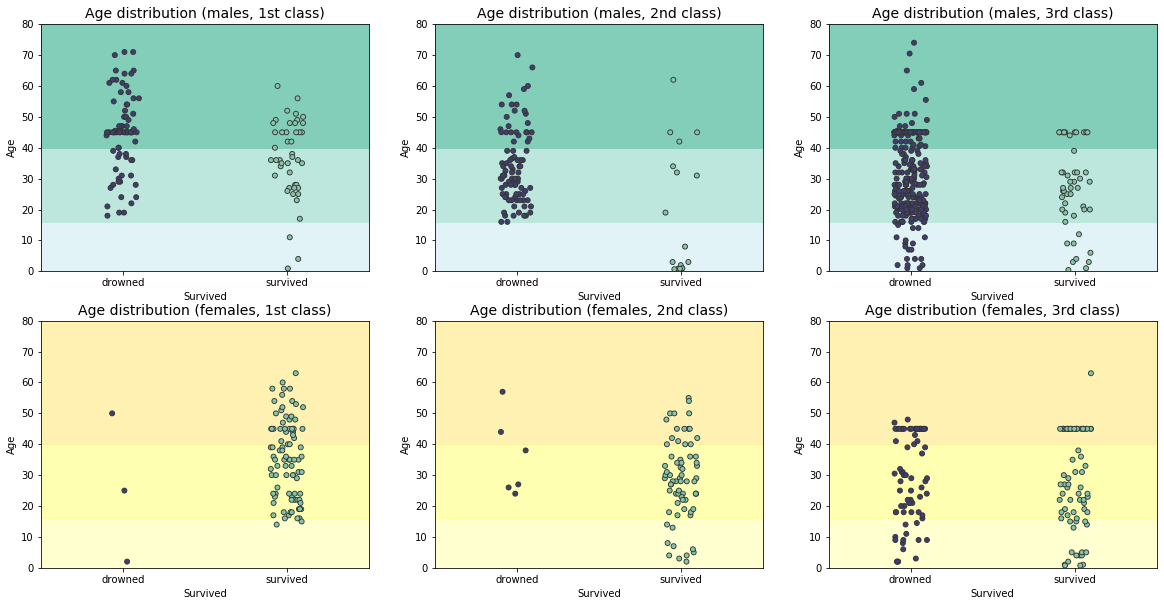

In [130]:
plt.figure(figsize=(20, 10))
palette=["#3f3e6fd1", "#85c6a9"]

plt.subplot(2, 3, 1)
sns.stripplot(x = 'Survived', y = 'Age', data = age_1_class[age_1_class['Sex']=='male'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#e1f3f6")
plt.axhspan(16, 40, color = "#bde6dd")
plt.axhspan(40, 80, color = "#83ceb9")
plt.title('Age distribution (males, 1st class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 2)
sns.stripplot(x = 'Survived', y = 'Age', data = age_2_class[age_2_class['Sex']=='male'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#e1f3f6")
plt.axhspan(16, 40, color = "#bde6dd")
plt.axhspan(40, 80, color = "#83ceb9")
plt.title('Age distribution (males, 2nd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 3)
sns.stripplot(x = 'Survived', y = 'Age', data = age_3_class[age_3_class['Sex']=='male'],
              linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#e1f3f6")
plt.axhspan(16, 40, color = "#bde6dd")
plt.axhspan(40, 80, color = "#83ceb9")
plt.title('Age distribution (males, 3rd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)


plt.subplot(2, 3, 4)
sns.stripplot(x = 'Survived', y = 'Age', data = age_1_class[age_1_class['Sex']=='female'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#ffff9978")
plt.axhspan(16, 40, color = "#ffff97bf")
plt.axhspan(40, 80, color = "#ffed97bf")
plt.title('Age distribution (females, 1st class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 5)
sns.stripplot(x = 'Survived', y = 'Age', data = age_2_class[age_2_class['Sex']=='female'],
     linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#ffff9978")
plt.axhspan(16, 40, color = "#ffff97bf")
plt.axhspan(40, 80, color = "#ffed97bf")
plt.title('Age distribution (females, 2nd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)

plt.subplot(2, 3, 6)
sns.stripplot(x = 'Survived', y = 'Age', data = age_3_class[age_3_class['Sex']=='female'],
              linewidth = 0.9, palette = palette)
plt.axhspan(0, 16, color = "#ffff9978")
plt.axhspan(16, 40, color = "#ffff97bf")
plt.axhspan(40, 80, color = "#ffed97bf")
plt.title('Age distribution (females, 3rd class)',fontsize= 14)
plt.xticks( np.arange(2), ['drowned', 'survived'])
plt.ylim(0, 80)


plt.show()

1. Only 1 kid whose age is less than 16 from 1st class died.
2. Many children from 3rd class died.
3. Most of the females from 1st and 2nd class survived.
4. Females from 3rd class in Age group 30+ drowned.
5. For 40+ males from 1st class, more survived.

# Gender

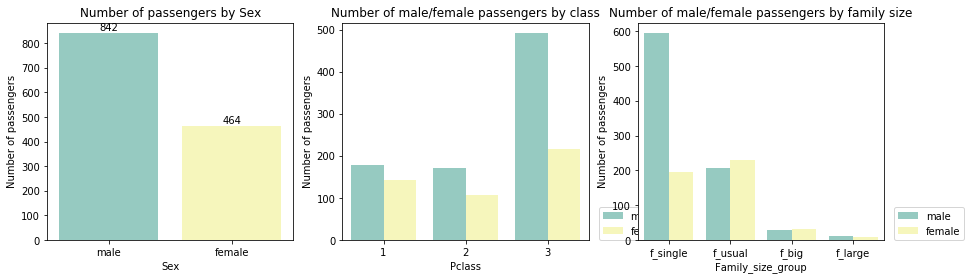

In [131]:
plt.figure(figsize = (15,4))

plt.subplot (1,3,1)
ax = sns.countplot(titanic_df['Sex'], palette="Set3")
plt.title('Number of passengers by Sex')
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (titanic_df['Sex'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.subplot (1,3,2)
sns.countplot( x = 'Pclass', data = titanic_df, hue = 'Sex', palette="Set3")
plt.title('Number of male/female passengers by class')
plt.ylabel('Number of passengers')
plt.legend( loc=(1.04,0))

plt.subplot (1,3,3)
sns.countplot( x = 'Family_size_group', data = titanic_df, hue = 'Sex', palette="Set3", order=titanic_df['Family_size_group'].value_counts().index)
plt.title('Number of male/female passengers by family size')
plt.ylabel('Number of passengers')
plt.legend( loc=(1.04,0));

# Embarked
Titanic had 3 embarkation points before the ship started its route to New York:

    Southampton
    Cherbourg
    Queenstown

Some passengers could leave Titanic in Cherbourg or Queenstown and avoid catastrophe. Also, the point of embarkation could have an influence on ticket fare and location on the ship. 

__Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)__

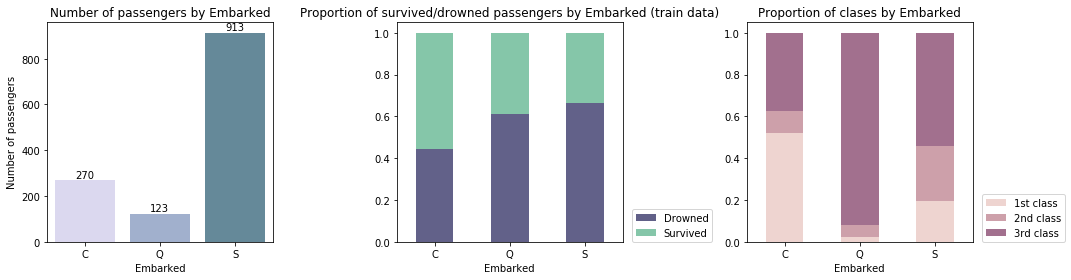

In [132]:
fig = plt.figure(figsize = (15,4))

ax1 = fig.add_subplot(131)
palette = sns.cubehelix_palette(5, start = 2)
ax = sns.countplot(titanic_df['Embarked'], palette = palette, order = ['C', 'Q', 'S'], ax = ax1)
plt.title('Number of passengers by Embarked')
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (titanic_df['Embarked'].value_counts())
labels = labels.sort_index()
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

ax2 = fig.add_subplot(132)
surv_by_emb = titanic_df.groupby('Embarked')['Survived'].value_counts(normalize = True)
surv_by_emb = surv_by_emb.unstack().sort_index()
surv_by_emb.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax2)
plt.title('Proportion of survived/drowned passengers by Embarked (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)


ax3 = fig.add_subplot(133)
class_by_emb = titanic_df.groupby('Embarked')['Pclass'].value_counts(normalize = True)
class_by_emb = class_by_emb.unstack().sort_index()
class_by_emb.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'], ax = ax3)
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0))
plt.title('Proportion of clases by Embarked')
_ = plt.xticks(rotation=False)

plt.tight_layout();

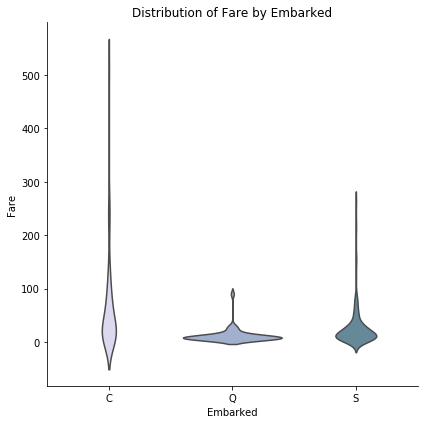

In [133]:
sns.catplot(x="Embarked", y="Fare", kind="violin", inner=None,
            data=titanic_df, height = 6, palette = palette, order = ['C', 'Q', 'S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

In [134]:
# Descriptive statistics:
pd.DataFrame(titanic_df.groupby('Embarked')['Fare'].describe())

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,270.0,62.336267,84.185996,4.0125,13.8583,28.51875,78.966675,512.3292
Q,123.0,12.409012,13.616133,6.7500,7.7500,7.75000,10.197900,90.0000
S,913.0,27.418824,37.096402,0.0000,8.0500,13.00000,27.750000,263.0000


In [135]:
titanic_df['Embarked'].isna().sum()

0

These two passengers traveled together (same ticket number). To impute missing values, we can use mode value for passengers with the closest fare value and Pclass.

# Fare

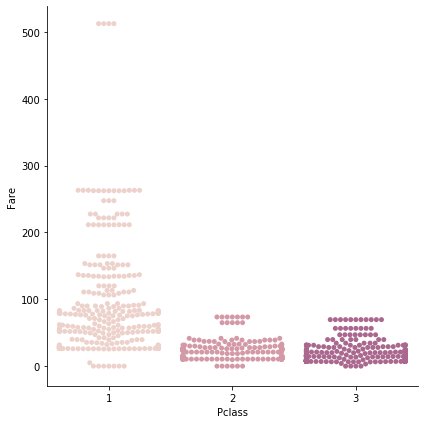

In [136]:
sns.catplot(x="Pclass", y="Fare", kind="swarm", data=titanic_df, palette=sns.cubehelix_palette(5, start = 3), height = 6)
plt.tight_layout()

We can see that the distribution of prices for the 2nd and third class is very similar.
The distribution for the first class prices is very different, and it has a wider spread. Also, on an average, the prices are higher.

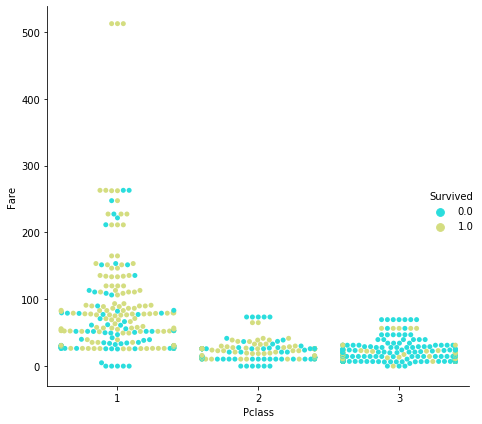

In [137]:
sns.catplot(x="Pclass", y="Fare", hue='Survived', kind="swarm", data=titanic_df, palette='rainbow', height = 6)
plt.tight_layout();

__Higher the fare a passenger paid, the more were the chances of his survival.__

In [138]:
titanic_df[titanic_df['Fare'] == min(titanic_df['Fare'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,deck,Family_size,Surname,Family_size_group
178,180,0.0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Mr,U,1,Leonard,f_single
262,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Mr,B,1,Harrison,f_single
270,272,1.0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Mr,U,1,Tornquist,f_single
276,278,0.0,2,"Parkes, Mr. Francis ""Frank""",male,45.0,0,0,239853,0.0,NaN,S,Mr,U,1,Parkes,f_single
301,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Mr,U,1,Johnson,f_single
412,414,0.0,2,"Cunningham, Mr. Alfred Fleming",male,45.0,0,0,239853,0.0,NaN,S,Mr,U,1,Cunningham,f_single
465,467,0.0,2,"Campbell, Mr. William",male,45.0,0,0,239853,0.0,NaN,S,Mr,U,1,Campbell,f_single
480,482,0.0,2,"Frost, Mr. Anthony Wood ""Archie""",male,45.0,0,0,239854,0.0,NaN,S,Mr,U,1,Frost,f_single
596,598,0.0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Mr,U,1,Johnson,f_single
632,634,0.0,1,"Parr, Mr. William Henry Marsh",male,45.0,0,0,112052,0.0,NaN,S,Mr,U,1,Parr,f_single


May be the first class passengers who paid $0 as fare should be the top crew members like the MD of the ship, captain, etc.

# Conclusion
We know that there were not enough boats on Board the Titanic for all passengers to be able to evacuate. After studying the information about the passengers, we can make some assumptions about who had a better chance of survival in a shipwreck situation as well as General observations about passengers.

* There are 891 passengers in the train dataset, 549 (61,6%) of them drowned and only 342 (38,4%) survived. But we know, that lifeboats (16 wooden lifeboats and four collapsible) could carry 53% of total passengers.
* The Age of all passengers vary from about 0.17 year to 80 years with average 29.88. The mean age of survived passenger is 28.23 which on 2.39 smaller than the mean age of drowned passengers (only passengers we know survived status for). It looks like there is a slightly bigger chance to survive for younger people.
* Exploring the title of passengers, we can see that the biggest proportion of survivors is in the "Mrs" group - a married woman. More than 80% drowned in the "Mr." group and nobody survived among the Reverend group.
* Most passengers don't have cabin numbers. The largest part of passengers with known cabin numbers was located on the 'C' deck and had 1st class ticket. 'C' deck is fifth by a percentage of the survivor.  
The largest surviving rate (among passengers with known cabin numbers in training dataset) had passengers from deck 'D'. Deck A was the closest to the deck with lifeboats, but it is the last in the surviving rate.
* The family size on board also seems to have an influence on chances for survival: there were two large families with sizes 8 and 11 and all their members from the training dataset are drowned.  We can observe that the percentage of survivors in people who have a family of 2, 3, 4 people is greater than in singles, then the percentage of survivors decreases as the family size increases.  
* Most of the Titanic's passengers were traveling third class (709). The second class is the smallest in terms of the number of passengers. Despite the previously identified prerequisites (on average, older people are more likely to die, and in the first class, the average age is higher than in other classes. Also, passengers on deck A, which consists of 100% first class, have a large proportion of drowned passengers), the first-class has the largest number of survivors and the proportion of survivors within the class is the largest.  
Third-class tickets had the highest number of drowned passengers, and most of the third-class passengers drowned.
* However, most of the male passengers of the first class drowned, and the female almost all survived. In the third grade, half of the females survived.  
There were overall more males than females on board, it is fair for each ticket class, but in the 3rd class number of males more than twice bigger than females.  
Almost 600 male passengers traveled without family members and only about 200 females, but in usual and big families there were slightly more female passengers.  
* Most numbers of passengers (914) were embarked in Southampton. Also, Southampton has the biggest proportion of drowned passengers. 270 passengers embarked in Cherbourg and more than 50% of them survived (in the training dataset). 123 of passengers embarked in Queenstown, the vast majority of them are 3rd class passengers.  

 
If we use a naive approach and consider all the parameters separately, then young female first-class passengers with the title Mrs have a moderate number of relatives on Board, who paid a large amount for a ticket and went on Board in  Cherbourg have a better chance of survival. 
For sure, there is a relationship between variables, and survival was influenced not only by the title, or ticket, or age itself but by a combination of factors that are to some extent interrelated.   
And It is obvious that there is no algorithm that can predict the survival rate by 100 percent based on the factors of the passenger's location on the ship or his age, since the human factor and the unpredicted emergency were involved in the rescue process.

# Thank you